In [ ]:
# for SCC jupyter
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import pandas as pd
import os
# should test if the number of df rows matches the number of txt rows
# some data files meet the problem:  
# such as twitter-2016train-A, should be 6000 examples, but some lines are read as one line

data_path='./data/'
import os

train_files=[]
test_files=[]
for file in os.listdir(data_path):
    if file.startswith('twitter') and file.endswith('.txt'):
        temp_path=os.path.join(data_path,file)
        if file=='twitter-2016test-A.txt':
            test_files.append(temp_path)
        else:
            train_files.append(temp_path)


In [ ]:
import nltk
nltk.download('punkt')

df_train=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines
for file in train_files:
    df_temp=pd.read_csv(file,sep='\t',names=['id','sentiment','text','none'])
    for idx, text in enumerate(df_temp.text.values):
        tokens = nltk.word_tokenize(text)
        if len(tokens)>length_threshold:
            df_temp.drop(index=[idx])
    df_train=pd.concat([df_train,df_temp])

[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/cs640g/gqiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_train=df_train[df_train.sentiment.isin(['negative','positive'])]
df_train

,id,sentiment,text,none
2,637666734300905472,negative,Sony rewards app is like a lot of 19 y.o femal...,NaN
4,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...,NaN
5,637807521500020737,negative,@AskPlayStation Why won't u guys help me out?!...,NaN
10,638141885022736385,positive,the only thing crazier than last-gen was 6th-g...,NaN
11,638159273072062464,positive,When you remember Sony is trying to make bible...,NaN
...,...,...,...,...
1960,640906424290254849,positive,May something in life make you as happy as Sno...,NaN
1961,640916034749263872,positive,I need to become a celebrity so I can just be ...,NaN
1962,641037652414742528,positive,Snoop dogg may be the funniest human alive,NaN
1964,641349309439479808,positive,SNOOP DOGG AKA SNOOPADELIC friday friday only ...,NaN


In [ ]:
df_test=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines
for file in test_files:
    df_temp=pd.read_csv(file,sep='\t',names=['id','sentiment','text','none'])
    for idx, text in enumerate(df_temp.text.values):
        tokens = nltk.word_tokenize(text)
        if len(tokens)>length_threshold:
            df_temp.drop(index=[idx])
    df_test=pd.concat([df_test,df_temp])
df_test=df_test[df_test.sentiment.isin(['negative','positive'])]
df_test
# should be 20633 rows, but get 20632 (?)

,id,sentiment,text,none
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
5,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday...",NaN
6,619998879447162881,positive,Watching Miss USA tomorrow JUST to see @Travis...,NaN
8,620013074272137216,positive,Call for reservations for lunch or dinner tomo...,NaN
...,...,...,...,...
20617,681820700592701440,positive,"@viagogo hiya, do you know when my tickets for...",NaN
20619,681827597962096641,positive,@PurposeTourCom Selling 4 Justin bieber standi...,NaN
20620,681828714376749057,positive,@Chidwack__ omg yes!! Then I'll be in Milan fo...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN


In [ ]:
print(df_train['sentiment'].value_counts())
print(df_test['sentiment'].value_counts())

positive    12740
negative     4578
Name: sentiment, dtype: int64
positive    7059
negative    3231
Name: sentiment, dtype: int64


In [ ]:
train_texts=df_train.text.values
train_sentiments=df_train.sentiment.values

In [ ]:
test_texts=df_test.text.values
test_sentiments=df_test.sentiment.values

In [ ]:
sent2labels={'negative':0, 'positive':1}
train_labels=[sent2labels[x] for x in train_sentiments]

In [ ]:
test_labels=[sent2labels[x] for x in test_sentiments]

In [ ]:
df_train.insert(df_train.shape[1],'label',train_labels)
df_train

,id,sentiment,text,none,label
2,637666734300905472,negative,Sony rewards app is like a lot of 19 y.o femal...,NaN,0
4,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...,NaN,1
5,637807521500020737,negative,@AskPlayStation Why won't u guys help me out?!...,NaN,0
10,638141885022736385,positive,the only thing crazier than last-gen was 6th-g...,NaN,1
11,638159273072062464,positive,When you remember Sony is trying to make bible...,NaN,1
...,...,...,...,...,...
1960,640906424290254849,positive,May something in life make you as happy as Sno...,NaN,1
1961,640916034749263872,positive,I need to become a celebrity so I can just be ...,NaN,1
1962,641037652414742528,positive,Snoop dogg may be the funniest human alive,NaN,1
1964,641349309439479808,positive,SNOOP DOGG AKA SNOOPADELIC friday friday only ...,NaN,1


In [ ]:
df_test.insert(df_test.shape[1],'label',test_labels)

In [ ]:
# split the train dataset to train and val with 9:1 ratio
from sklearn.model_selection import train_test_split
df_train_split,df_val_split=train_test_split(df_train[['text','label']], test_size=.1)

In [ ]:
from datasets import Dataset,Features,Value,ClassLabel
class_names = ["negative", "positive"]
sentiment_features = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

train_dataset=Dataset.from_pandas(df_train_split[['text','label']],features=sentiment_features)
val_dataset=Dataset.from_pandas(df_val_split[['text','label']],features=sentiment_features)

In [ ]:
test_dataset=Dataset.from_pandas(df_test[['text','label']],features=sentiment_features)

In [ ]:
model_names=['prajjwal1/bert-mini','xlnet-large-cased','distilgpt2']
model_index=2
model_name=model_names[model_index]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name,force_download=True,)

def tokenize_function(examples):
    if model_index==2: # for gpt model
        tokenizer.pad_token = tokenizer.eos_token
    return tokenizer(examples["text"], padding='max_length', truncation=True,max_length=128)

tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

In [ ]:
len(tokenized_train_datasets[0]['input_ids'])

128

In [ ]:
import gc,torch
trainer=None
model=None
model_f=None
trainer_f=None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from transformers import AutoModelForSequenceClassification

# model init function for hyperparameter search
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, return_dict=True)
# init the model for train 
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
if model_index==2: # for gpt model
    model.config.pad_token_id = model.config.eos_token_id

loading configuration file https://huggingface.co/distilgpt2/resolve/main/config.json from cache at /usr4/cs640g/gqiu/.cache/huggingface/transformers/f985248d2791fcff97732e4ee263617adec1edb5429a2b8421734c6d14e39bee.422318838d1ec4e061efb4ea29671cb2a044e244dc69229682bebd7cacc81631
Model config GPT2Config {
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_p

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments,Trainer


training_args = TrainingArguments(output_dir=model_name+'_2_classes_ckpt',
                                  learning_rate=5e-6,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=32,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=8,
                                  evaluation_strategy="epoch",
                                 )
trainer = Trainer(
    model=model, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
## Code use to search to best hyperparameters
# single gpu, use optuna as backend (use pip install optuna)

############## not used now ###############
# def my_hp_space(trial):
#     return {
#         "learning_rate": trial.suggest_float("learning_rate", [5e-5, 3e-5, 2e-5, 2e-4], log=True),
#         "num_train_epochs": trial.suggest_int("num_train_epochs", [1,3, 5]),
#         "seed": trial.suggest_int("seed", 1, 40),
#         "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16, 32, 64]),
#     }
# trainer.hyperparameter_search(
#     direction="maximize", 
#     backend="optuna", 
#     hp_space=my_hp_space,
# )

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 15586
  Num Epochs = 8
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 3904


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.546583,0.741917
2,0.612100,0.330678,0.850462
3,0.451500,0.278983,0.878753
4,0.292700,0.277390,0.885681
5,0.255700,0.268936,0.887991
6,0.236400,0.277587,0.887413
7,0.223600,0.269917,0.888568
8,0.209100,0.272809,0.889723


The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1732
  Batch size = 32
Saving model checkpoint to distilgpt2_2_classes_ckpt/checkpoint-500
Configuration saved in distilgpt2_2_classes_ckpt/checkpoint-500/config.json
Model weights saved in distilgpt2_2_classes_ckpt/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1732
  Batch size = 32
Saving model checkpoint to distilgpt2_2_classes_ckpt/checkpoint-1000
Configuration saved in distilgpt2_2_classes_ckpt/checkpoint-1000/config.json
Model weights saved in distilgpt2_2_classes_ckpt/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSeque

TrainOutput(global_step=3904, training_loss=0.3134959388951786, metrics={'train_runtime': 562.6644, 'train_samples_per_second': 221.603, 'train_steps_per_second': 6.938, 'total_flos': 4072718242676736.0, 'train_loss': 0.3134959388951786, 'epoch': 8.0})

In [ ]:
# trainer.evaluate(tokenized_train_datasets)

In [ ]:
# trainer.evaluate(tokenized_val_datasets)

In [ ]:
trainer.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 10290
  Batch size = 32


{'eval_loss': 0.23449666798114777,
 'eval_accuracy': 0.9047619047619048,
 'eval_runtime': 14.758,
 'eval_samples_per_second': 697.249,
 'eval_steps_per_second': 21.819,
 'epoch': 8.0}

In [ ]:
trainer.save_model('clean_'+model_name+'_2_classes_model')

Saving model checkpoint to clean_distilgpt2_2_classes_model
Configuration saved in clean_distilgpt2_2_classes_model/config.json
Model weights saved in clean_distilgpt2_2_classes_model/pytorch_model.bin


In [ ]:
# access the training history to plot the loss graph
his=[]
for item in trainer.state.log_history:
    if item['epoch'] in [1.0,2.0,3.0,4.0,5.0, 6.0,7.0,8.0]:
        his.append(item)
his=trainer.state.log_history
his

[{'eval_loss': 0.5465830564498901,
  'eval_accuracy': 0.7419168591224018,
  'eval_runtime': 2.5071,
  'eval_samples_per_second': 690.826,
  'eval_steps_per_second': 21.937,
  'epoch': 1.0,
  'step': 488},
 {'loss': 0.6121,
  'learning_rate': 2.133105802047782e-06,
  'epoch': 1.02,
  'step': 500},
 {'eval_loss': 0.33067798614501953,
  'eval_accuracy': 0.8504618937644342,
  'eval_runtime': 2.4897,
  'eval_samples_per_second': 695.665,
  'eval_steps_per_second': 22.091,
  'epoch': 2.0,
  'step': 976},
 {'loss': 0.4515,
  'learning_rate': 4.266211604095564e-06,
  'epoch': 2.05,
  'step': 1000},
 {'eval_loss': 0.2789825201034546,
  'eval_accuracy': 0.8787528868360277,
  'eval_runtime': 2.5683,
  'eval_samples_per_second': 674.376,
  'eval_steps_per_second': 21.415,
  'epoch': 3.0,
  'step': 1464},
 {'loss': 0.2927,
  'learning_rate': 4.399707174231333e-06,
  'epoch': 3.07,
  'step': 1500},
 {'eval_loss': 0.27738967537879944,
  'eval_accuracy': 0.8856812933025404,
  'eval_runtime': 2.5,
  'e

In [ ]:
train_losses=[]
val_losses=[]
for i in range(8):
    if i==7:
        train_losses.append(his[2*i+1]['train_loss'])
    else:
        train_losses.append(his[2*i+1]['loss'])
    val_losses.append(his[2*i]['eval_loss'])
print(train_losses,'\n',val_losses)

[0.6121, 0.4515, 0.2927, 0.2557, 0.2364, 0.2236, 0.2091, 0.3134959388951786] 
 [0.5465830564498901, 0.33067798614501953, 0.2789825201034546, 0.27738967537879944, 0.268936425447464, 0.27758699655532837, 0.26991719007492065, 0.27280911803245544]


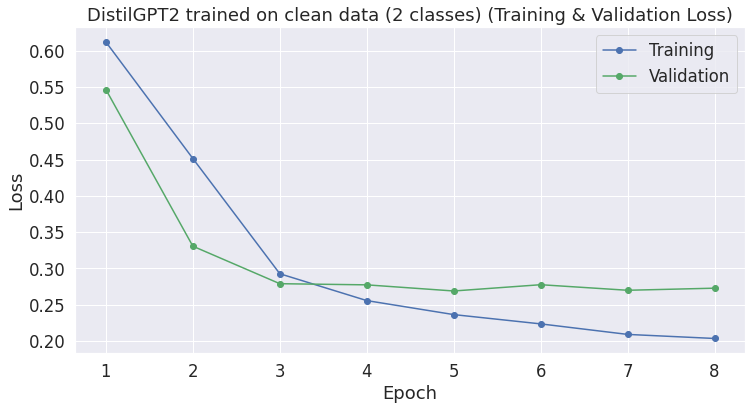

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1, 2, 3, 4,5,6,7,8],train_losses, 'b-o', label="Training")
plt.plot([1, 2, 3, 4,5,6,7,8],val_losses, 'g-o', label="Validation")

# Label the plot.
plt.title("DistilGPT2 trained on clean data (2 classes) (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
model_f = AutoModelForSequenceClassification.from_pretrained('noisy_'+model_name+'_model', num_labels=2)

loading configuration file noisy_distilgpt2_model/config.json
Model config GPT2Config {
  "_name_or_path": "distilgpt2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2ForSequenceClassification"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "pad_token_id": 50256,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "torch_dtype": "float32",
  "transformers_version"

In [ ]:
training_args_f = TrainingArguments(output_dir=model_name+'_finetune_2_classes_ckpt',
                                  learning_rate=5e-6,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=32,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=8,
                                  evaluation_strategy="epoch",
                                 )
trainer_f = Trainer(
    model=model_f, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args_f,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer_f.train()

The following columns in the training set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 15586
  Num Epochs = 8
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 3904


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.346488,0.853349
2,0.462500,0.257042,0.897229
3,0.308100,0.232416,0.909353
4,0.253000,0.227075,0.907621
5,0.219000,0.225134,0.908776
6,0.205500,0.227604,0.908776
7,0.193800,0.230021,0.909353
8,0.184000,0.228826,0.909353


The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1732
  Batch size = 32
Saving model checkpoint to distilgpt2_finetune_2_classes_ckpt/checkpoint-500
Configuration saved in distilgpt2_finetune_2_classes_ckpt/checkpoint-500/config.json
Model weights saved in distilgpt2_finetune_2_classes_ckpt/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1732
  Batch size = 32
Saving model checkpoint to distilgpt2_finetune_2_classes_ckpt/checkpoint-1000
Configuration saved in distilgpt2_finetune_2_classes_ckpt/checkpoint-1000/config.json
Model weights saved in distilgpt2_finetune_2_classes_ckpt/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set

TrainOutput(global_step=3904, training_loss=0.2524529715053371, metrics={'train_runtime': 563.9403, 'train_samples_per_second': 221.101, 'train_steps_per_second': 6.923, 'total_flos': 4072718242676736.0, 'train_loss': 0.2524529715053371, 'epoch': 8.0})

In [ ]:
trainer_f.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 10290
  Batch size = 32


{'eval_loss': 0.22575587034225464,
 'eval_accuracy': 0.9124392614188532,
 'eval_runtime': 14.7359,
 'eval_samples_per_second': 698.295,
 'eval_steps_per_second': 21.851,
 'epoch': 8.0}

In [ ]:
# access the training history to plot the loss graph
his=[]
for item in trainer_f.state.log_history:
    if item['epoch'] in [1.0,2.0,3.0,4.0,5.0, 6.0,7.0,8.0]:
        his.append(item)
his=trainer_f.state.log_history

In [ ]:
train_losses=[]
val_losses=[]
for i in range(8):
    if i==7:
        train_losses.append(his[2*i+1]['train_loss'])
    else:
        train_losses.append(his[2*i+1]['loss'])
    val_losses.append(his[2*i]['eval_loss'])
print(train_losses,'\n',val_losses)

[0.4625, 0.3081, 0.253, 0.219, 0.2055, 0.1938, 0.184, 0.2524529715053371] 
 [0.3464876413345337, 0.25704216957092285, 0.2324160933494568, 0.22707492113113403, 0.22513370215892792, 0.22760386765003204, 0.23002110421657562, 0.22882647812366486]


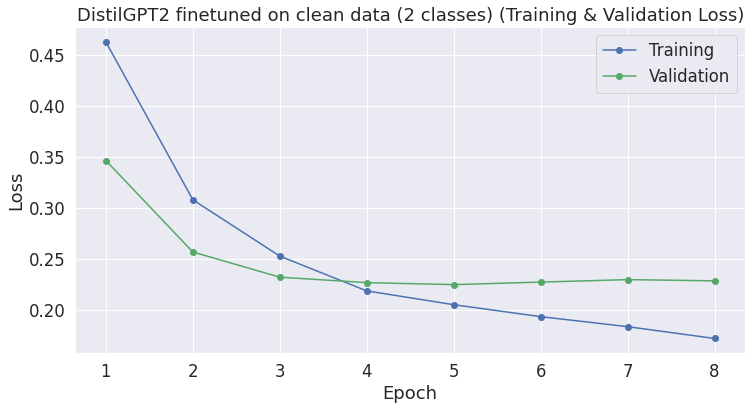

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1, 2, 3, 4,5,6,7,8],train_losses, 'b-o', label="Training")
plt.plot([1, 2, 3, 4,5,6,7,8],val_losses, 'g-o', label="Validation")

# Label the plot.
plt.title("DistilGPT2 finetuned on clean data (2 classes) (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()